### This script relies on a active environment with Basemap
If that is not possible, you properly have to outcomment a thing or two.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import ezodf

In [2]:
ports_1 = gpd.read_file('../Data Sources/Global Ports Shapefile (1)/WPI.shp').fillna('None')
countries = gpd.read_file('../Data Sources/countries (1)/ne_50m_admin_0_countries.shp').fillna(value='None')

# Let's see the ports.

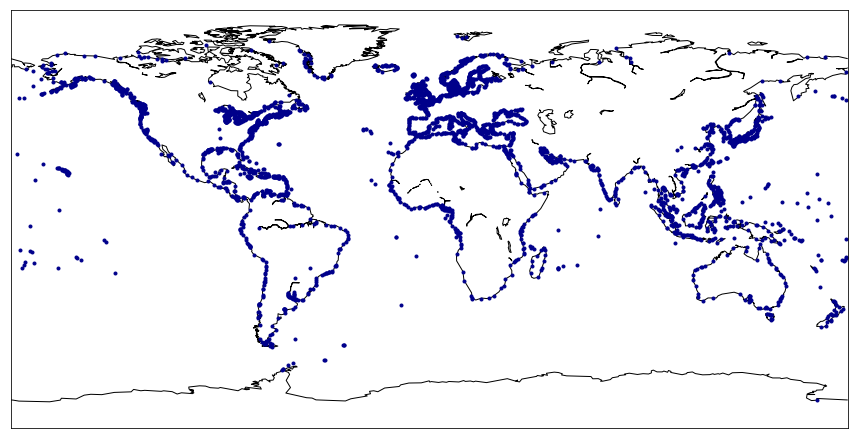

In [3]:
# Let's visualise the ports
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in ports_1.index:
    map.plot(list(ports_1.loc[port].geometry.coords)[0][0],
            list(ports_1.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

### Berief descriptive statistics

In [4]:
ports_1.columns

Index(['INDEX_NO', 'REGION_NO', 'PORT_NAME', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'LAT_DEG', 'LAT_MIN', 'LAT_HEMI', 'LONG_DEG', 'LONG_MIN',
       'LONG_HEMI', 'PUB', 'CHART', 'HARBORSIZE', 'HARBORTYPE', 'SHELTER',
       'ENTRY_TIDE', 'ENTRYSWELL', 'ENTRY_ICE', 'ENTRYOTHER', 'OVERHD_LIM',
       'CHAN_DEPTH', 'ANCH_DEPTH', 'CARGODEPTH', 'OIL_DEPTH', 'TIDE_RANGE',
       'MAX_VESSEL', 'HOLDGROUND', 'TURN_BASIN', 'PORTOFENTR', 'US_REP',
       'ETAMESSAGE', 'PILOT_REQD', 'PILOTAVAIL', 'LOC_ASSIST', 'PILOTADVSD',
       'TUGSALVAGE', 'TUG_ASSIST', 'PRATIQUE', 'SSCC_CERT', 'QUAR_OTHER',
       'COMM_PHONE', 'COMM_FAX', 'COMM_RADIO', 'COMM_VHF', 'COMM_AIR',
       'COMM_RAIL', 'CARGOWHARF', 'CARGO_ANCH', 'CARGMDMOOR', 'CARBCHMOOR',
       'CARICEMOOR', 'MED_FACIL', 'GARBAGE', 'DEGAUSS', 'DRTYBALLST',
       'CRANEFIXED', 'CRANEMOBIL', 'CRANEFLOAT', 'LIFT_100_', 'LIFT50_100',
       'LIFT_25_49', 'LIFT_0_24', 'LONGSHORE', 'ELECTRICAL', 'SERV_STEAM',
       'NAV_EQUIP', 'ELECREPAIR', '

In [5]:
ports_1.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,None,None,None,None,None,None,None,None,None,POINT (146.8333333333333 43.86666666666667)
1,61110.0,61100.0,MOMBETSU KO,JP,44.350000,143.350000,44.0,21.0,N,143.0,...,None,Y,None,Y,None,None,C,None,None,POINT (143.35 44.35)
2,61120.0,61100.0,ABASHIRI KO,JP,44.016667,144.283333,44.0,1.0,N,144.0,...,None,Y,None,Y,None,None,C,None,None,POINT (144.2833333333333 44.01666666666667)
3,61130.0,61100.0,NEMURO KO,JP,43.333333,145.583333,43.0,20.0,N,145.0,...,Y,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.33333333333334)
4,61140.0,61100.0,HANASAKI KO,JP,43.283333,145.583333,43.0,17.0,N,145.0,...,None,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.28333333333333)


In [6]:
ports_1.HARBORTYPE.unique()

array(['CN', 'CB', 'OR', 'RB', 'RN', 'LC', 'CT', 'RT', 'TH', 'None'],
      dtype=object)

In [7]:
reducedHarborSize = []

for harborType in ports_1.HARBORTYPE:
    if harborType in ['CN','CB','CT']:
        reducedHarborSize.append('Coastal')
    if harborType in ['RB','RN','RT']:
        reducedHarborSize.append('River')
    if harborType in ['LC']:
        reducedHarborSize.append('Lake')
    if harborType in ['OR','TH','None']:
        reducedHarborSize.append('Other')

ports_1['HARBORTYPE'] = reducedHarborSize

In [8]:
ports_1.HARBORTYPE.unique()

array(['Coastal', 'Other', 'River', 'Lake'], dtype=object)

In [9]:
ports_1.shape

(3669, 79)

In [10]:
ports_1.RAILWAY.unique()

array(['None', 'M', 'L', 'S'], dtype=object)

In [11]:
ports_1.HARBORSIZE.unique()

array(['V', 'S', 'M', 'L', 'None'], dtype=object)

In [12]:
reducedHarborSize = []

for harborType in ports_1.HARBORSIZE:
    if harborType in ['V','v']:
        reducedHarborSize.append('Minor')
    if harborType in ['M','m']:
        reducedHarborSize.append('Medium')
    if harborType in ['S','s']:
        reducedHarborSize.append('Small')
    if harborType in ['L','l']:
        reducedHarborSize.append('Major')
    if harborType in ['None','none']:
        reducedHarborSize.append('Other')

ports_1['HARBORSIZE'] = reducedHarborSize

In [13]:
ports_1.HARBORSIZE.unique()

array(['Minor', 'Small', 'Medium', 'Major', 'Other'], dtype=object)

In [132]:
sizeDist = {size:sum([True if obs == size else False for obs in ports_1.HARBORSIZE]) for size in ports_1.HARBORSIZE.unique()}
typeDist = {type:sum([True if obs == type else False for obs in ports_1.HARBORTYPE]) for type in ports_1.HARBORTYPE.unique()}
railwayAccessDist = {size:sum([True if obs == size else False for obs in ports_1.RAILWAY]) for size in ports_1.RAILWAY.unique()}

print('Distribution of ports in each size category:\n\n',sizeDist)
print('\nFor "Sizes": Information/Observations Ratio = %.3f' % ((sum(sizeDist.values())-sizeDist['Other'])\
                                                              /sum(sizeDist.values())))

print('\n-------------------------------------------------------------------------')
print('\nDistribution of ports in each type category:\n\n', typeDist)
print('\nFor "Types": Information/Observations Ratio = %.3f' % ((sum(typeDist.values())-typeDist['Other'])\
                                                              /sum(typeDist.values())))

print('\n-------------------------------------------------------------------------')
print('\nDistribution of ports with Railway access:\n\n',railwayAccess)
print('\nFor "Railway Access": Information/Observations Ratio = %.3f' % ((sum(railwayAccessDist.values())-railwayAccessDist['None'])\
                                                              /sum(railwayAccessDist.values())))

Distribution of ports in each size category:

 {'Minor': 2153, 'Small': 990, 'Medium': 361, 'Major': 160, 'Other': 5}

For "Sizes": Information/Observations Ratio = 0.999

-------------------------------------------------------------------------

Distribution of ports in each type category:

 {'Coastal': 2112, 'Other': 670, 'River': 814, 'Lake': 73}

For "Types": Information/Observations Ratio = 0.817

-------------------------------------------------------------------------

Distribution of ports with Railway access:

 {'None': 2159, 'M': 377, 'L': 146, 'S': 987}

For "Railway Access": Information/Observations Ratio = 0.412


For "Types": Information/Observations Ratio = 0.412


## Joining the countries shapefile with the ports
But first ensuring country-classification attached on individual ports.

#### We want the ports to have a country classification attach, i.e. a unique ISO_A3 code. This can be done via a spatial join of the ports and the geometries in the country shapefile. However, some of the countries (more like states) in the country-shapefile doesn't not have a ISO_A3 code, which is corrected below.

Alternating the iso codes is needed, because some have a iso_code of -99 (Because it isn't a sovereign state)

http://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-details/

https://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code

In [16]:
IsoCodes = countries[['ISO_A2','GU_A3','NAME']].sort_values(by=['ISO_A2'])
IsoCodes = IsoCodes.reset_index(drop=True)

# Manually based on their SOV_A3 code
# Reference: https://www.iban.com/country-codes
# Not bullet proof, but it works for the purpose

for i in IsoCodes.index:
    if IsoCodes['ISO_A2'].loc[i]=='-99':
        
        IsoCodes['ISO_A2'].loc[i] = IsoCodes['GU_A3'].loc[i][0:2]
IsoCodes = IsoCodes.sort_values(by=['NAME'])
IsoCodes = IsoCodes.set_index(['ISO_A2'])
# The below is removed because is is a duplicate, and the GU_A3 (approx. of ISO_A3) code does not appear in the second source
# above.
IsoCodes = IsoCodes[IsoCodes.GU_A3 != 'IOA']

In [17]:
iso3CodePorts = []
nameCountryPorts = []

for country in ports_1.COUNTRY:
    if country in list(IsoCodes.index):
        if country == 'AU':
            iso3CodePorts.append('AUS')
            nameCountryPorts.append('Australia')
        elif country == 'SO':
            iso3CodePorts.append('SOM')
            nameCountryPorts.append('Somalia')
        elif country == 'CY':
            iso3CodePorts.append('CYP')
            nameCountryPorts.append('Cyprus')
        else:
            iso3CodePorts.append(IsoCodes['GU_A3'].loc[country])
            nameCountryPorts.append(IsoCodes['NAME'].loc[country])
    else:
        iso3CodePorts.append('None')
        nameCountryPorts.append('None')

In [18]:
ports_1['ISO3'] = np.array(iso3CodePorts)
ports_1['CountryName'] = np.array(nameCountryPorts)

### Performing the join

In [19]:
# Joining together the ports with the country file
ports = gpd.sjoin(ports_1,countries,how='left')

# Selecting the columns of interest
ports = ports[['PORT_NAME','ISO3','CountryName','LATITUDE','LONGITUDE','HARBORSIZE','HARBORTYPE','RAILWAY','geometry']]

# Renaming the chosen columns
ports.columns=['port_name','iso3','country_name','latitude','longitude','harborsize','harbortype','railway','geometry']

In [20]:
ports.head()

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry
0,SHAKOTAN,RUS,Russia,43.866667,146.833333,Minor,Coastal,None,POINT (146.8333333333333 43.86666666666667)
1,MOMBETSU KO,JPN,Japan,44.350000,143.350000,Minor,Coastal,None,POINT (143.35 44.35)
2,ABASHIRI KO,JPN,Japan,44.016667,144.283333,Small,Coastal,None,POINT (144.2833333333333 44.01666666666667)
3,NEMURO KO,JPN,Japan,43.333333,145.583333,Small,Coastal,None,POINT (145.5833333333333 43.33333333333334)
4,HANASAKI KO,JPN,Japan,43.283333,145.583333,Minor,Coastal,None,POINT (145.5833333333333 43.28333333333333)


### Investigating the ports without any country-classification

In [21]:
# How many ports do not have a ISO3 code?
sum([1 if iso == 'None' else 0 for iso in ports.iso3])

23

In [22]:
# Only continuing with the ports without country classification
portsNoCountry = ports[[True if iso == 'None' else False for iso in ports.iso3]]

In [23]:
print('The number of ports in each possible harbor size are:\n\n',
     {size:sum([True if harborsize == size else False for harborsize in ports.harborsize]) for\
     size in ports.harborsize.unique()})

The number of ports in each possible harbor size are:

 {'Minor': 2153, 'Small': 990, 'Medium': 361, 'Major': 160, 'Other': 5}


In [24]:
print('The number of ports without a country is:\n\n',
      {size:sum([1 if iso == 'None' else 0 for iso in portsNoCountry[[True if portsize == size else False for \
                                                              portsize in portsNoCountry.harborsize]].iso3])\
        for size in portsNoCountry.harborsize.unique()})

The number of ports without a country is:

 {'Minor': 16, 'Medium': 4, 'Small': 3}


For now, nothing is done about the ports with missing country classification, as the amount is to small compared to total number of ports. 

### Let's add the "busiestPort" attribute

In [25]:
busiestPorts = pd.read_csv('../Data Sources/Busiest Ports, Global (1)/Busiest_ports.csv',usecols=['Port','Country','2017'])

In [26]:
busiestPorts

,Port,Country,2017
0,Shanghai,China China,40233
1,Singapore,Singapore Singapore,33666
2,Shenzhen,China China,25208
3,Ningbo-Zhoushan,China China,24607
4,Hong Kong,China China,20770
5,Busan,South Korea South Korea,20493
6,Guangzhou,China China,20370
7,Qingdao,China China,18262
8,Dubai,United Arab Emirates United Arab Emirates,15368
9,Tianjin,China China,15040


In [27]:
sum([1 if any([True if name.lower() in port.lower() else False for port in busiestPorts.Port]) else 0 for name in ports.port_name ])

15

In [28]:
[print(name) for name in ports.port_name if any([True if name.lower() in port.lower() else False for port in busiestPorts.Port])]

ZHOUSHAN
DALIAN
GUANGZHOU
HONG KONG
XIAMEN
LAE
PORT KLANG
ROTTERDAM
HAMBURG
LOS ANGELES
DUBA
TANJUNG PELEPAS
LAEM CHABANG
SHANGHAI
NINGBO


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [29]:
sum([1 if any([True if name.lower() in port.lower() else False for port in ports.port_name]) else 0 for name in busiestPorts.Port ])

15

In [30]:
ports.head()

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry
0,SHAKOTAN,RUS,Russia,43.866667,146.833333,Minor,Coastal,None,POINT (146.8333333333333 43.86666666666667)
1,MOMBETSU KO,JPN,Japan,44.350000,143.350000,Minor,Coastal,None,POINT (143.35 44.35)
2,ABASHIRI KO,JPN,Japan,44.016667,144.283333,Small,Coastal,None,POINT (144.2833333333333 44.01666666666667)
3,NEMURO KO,JPN,Japan,43.333333,145.583333,Small,Coastal,None,POINT (145.5833333333333 43.33333333333334)
4,HANASAKI KO,JPN,Japan,43.283333,145.583333,Minor,Coastal,None,POINT (145.5833333333333 43.28333333333333)


In [31]:
dataHolder = [[] for i in np.arange(3)]

for name in ports.port_name:
    if any([True if portname.lower() in name.lower() else False for portname in busiestPorts.Port]):
        #print(name)
        try:
            where = [i for i,e in enumerate(busiestPorts.Port) if name.lower() in e.lower()][0]
            dataHolder[0].append(1)
            dataHolder[1].append(where+1)
            dataHolder[2].append(busiestPorts.iloc[where,-1])
        except:
            dataHolder[0].append(0)
            dataHolder[1].append(0)
            dataHolder[2].append(0)
    else:
        dataHolder[0].append(0)
        dataHolder[1].append(0)
        dataHolder[2].append(0)


In [32]:
sum(dataHolder[0])

11

In [33]:
ports['top_20_busiest_ports'] = dataHolder[0]
ports['busiest_ports_ranking'] = dataHolder[1]
ports['amount_shipped_through'] = dataHolder[2]

In [34]:
ports.head()

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
0,SHAKOTAN,RUS,Russia,43.866667,146.833333,Minor,Coastal,None,POINT (146.8333333333333 43.86666666666667),0,0,0
1,MOMBETSU KO,JPN,Japan,44.350000,143.350000,Minor,Coastal,None,POINT (143.35 44.35),0,0,0
2,ABASHIRI KO,JPN,Japan,44.016667,144.283333,Small,Coastal,None,POINT (144.2833333333333 44.01666666666667),0,0,0
3,NEMURO KO,JPN,Japan,43.333333,145.583333,Small,Coastal,None,POINT (145.5833333333333 43.33333333333334),0,0,0
4,HANASAKI KO,JPN,Japan,43.283333,145.583333,Minor,Coastal,None,POINT (145.5833333333333 43.28333333333333),0,0,0


In [35]:
top_twenty_ports = ports.sort_values(by=['busiest_ports_ranking'],ascending=False)[['port_name','busiest_ports_ranking']]
top_twenty_ports = top_twenty_ports.reset_index(drop=True)
top_twenty_ports.loc[0:19]

,port_name,busiest_ports_ranking
0,LAEM CHABANG,20
1,TANJUNG PELEPAS,19
2,HAMBURG,18
3,LOS ANGELES,17
4,DALIAN,16
5,XIAMEN,14
6,PORT KLANG,12
7,ROTTERDAM,11
8,GUANGZHOU,7
9,HONG KONG,5


In [36]:
ports[(ports.country_name=='Taiwan') & (ports.harborsize == 'L')]

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through


In [37]:
ports[ports.port_name=='CHI-LUNG']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
324,CHI-LUNG,TWN,Taiwan,25.133333,121.766667,Major,Coastal,M,POINT (121.7666666666667 25.13333333333333),0,0,0


In [38]:
ports.loc[324,'top_20_busiest_ports'] = 1
ports.loc[324,'busiest_ports_ranking'] = 15
ports.loc[324,'amount_shipped_through'] = 10271

In [39]:
ports[ports.port_name=='ANTWERPEN']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
95,ANTWERPEN,BEL,Belgium,51.216667,4.4,Major,River,None,POINT (4.4 51.21666666666667),0,0,0


In [40]:
ports.loc[95,'top_20_busiest_ports'] = 1
ports.loc[95,'busiest_ports_ranking'] = 13
ports.loc[95,'amount_shipped_through'] = 10451

In [41]:
ports[ports.port_name=='CHIWAN']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
1779,CHIWAN,CHN,China,19.966667,110.033333,Minor,Coastal,S,POINT (110.0333333333333 19.96666666666667),0,0,0


In [42]:
ports.loc[1779,'top_20_busiest_ports'] = 1
ports.loc[1779,'busiest_ports_ranking'] = 3
ports.loc[1779,'amount_shipped_through'] = 25208

In [43]:
ports[ports.port_name == 'SERANGOON HARBOR']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
3036,SERANGOON HARBOR,SGP,Singapore,1.4,103.95,Minor,Coastal,None,POINT (103.95 1.4),0,0,0


In [44]:
ports.loc[3036,'top_20_busiest_ports'] = 1
ports.loc[3036,'busiest_ports_ranking'] = 2
ports.loc[3036,'amount_shipped_through'] = 33666

In [45]:
ports[ports.port_name == 'NINGBO']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
2712,NINGBO,CHN,China,29.883333,121.55,Small,River,S,POINT (121.55 29.88333333333333),0,0,0


In [46]:
ports.loc[2712,'top_20_busiest_ports'] = 1
ports.loc[2712,'busiest_ports_ranking'] = 4
ports.loc[2712,'amount_shipped_through'] = 24607

In [47]:
ports[ports.port_name == 'PUSAN']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
122,PUSAN,KOR,South Korea,35.1,129.033333,Major,Coastal,M,POINT (129.0333333333333 35.1),0,0,0


In [48]:
ports.loc[122,'top_20_busiest_ports'] = 1
ports.loc[122,'busiest_ports_ranking'] = 6
ports.loc[122,'amount_shipped_through'] = 20493

In [49]:
ports[ports.port_name == 'QINGDAO GANG']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
138,QINGDAO GANG,CHN,China,36.033333,120.266667,Major,Other,S,POINT (120.2666666666667 36.03333333333333),0,0,0


In [50]:
ports.loc[138,'top_20_busiest_ports'] = 1
ports.loc[138,'busiest_ports_ranking'] = 8
ports.loc[138,'amount_shipped_through'] = 18262

In [51]:
ports[ports.port_name == 'DUBAYY']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
1159,DUBAYY,ARE,United Arab Emirates,25.266667,55.3,Small,Coastal,None,POINT (55.3 25.26666666666667),0,0,0


In [52]:
ports.loc[1159,'top_20_busiest_ports'] = 1
ports.loc[1159,'busiest_ports_ranking'] = 9
ports.loc[1159,'amount_shipped_through'] = 15368

In [53]:
ports[ports.port_name == 'TIANJIN XIN GANG']

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through
171,TIANJIN XIN GANG,CHN,China,38.966667,117.833333,Major,River,L,POINT (117.8333333333333 38.96666666666667),0,0,0


In [54]:
ports.loc[171,'top_20_busiest_ports'] = 1
ports.loc[171,'busiest_ports_ranking'] = 10
ports.loc[171,'amount_shipped_through'] = 15040

In [55]:
ports['code'] = ports.port_name

### Potential Attributes

In [56]:
# The purpose below is to give an idea of the content of the potential attributes, which could be included for visualisation.
print('The excluded columns are:\n\n',
      list(ports_1.columns)[0:16]+list(ports_1.columns)[-4:],
     '\n\nThey are excluded because the already are included or because there is too many unique values.',
     '\n\nThe potentially interesting attributes are:\n\n',
      np.array(ports_1.columns)[16:-4])


The excluded columns are:

 ['INDEX_NO', 'REGION_NO', 'PORT_NAME', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'LAT_DEG', 'LAT_MIN', 'LAT_HEMI', 'LONG_DEG', 'LONG_MIN', 'LONG_HEMI', 'PUB', 'CHART', 'HARBORSIZE', 'HARBORTYPE', 'RAILWAY', 'geometry', 'ISO3', 'CountryName'] 

They are excluded because the already are included or because there is too many unique values. 

The potentially interesting attributes are:

 ['SHELTER' 'ENTRY_TIDE' 'ENTRYSWELL' 'ENTRY_ICE' 'ENTRYOTHER' 'OVERHD_LIM'
 'CHAN_DEPTH' 'ANCH_DEPTH' 'CARGODEPTH' 'OIL_DEPTH' 'TIDE_RANGE'
 'MAX_VESSEL' 'HOLDGROUND' 'TURN_BASIN' 'PORTOFENTR' 'US_REP' 'ETAMESSAGE'
 'PILOT_REQD' 'PILOTAVAIL' 'LOC_ASSIST' 'PILOTADVSD' 'TUGSALVAGE'
 'TUG_ASSIST' 'PRATIQUE' 'SSCC_CERT' 'QUAR_OTHER' 'COMM_PHONE' 'COMM_FAX'
 'COMM_RADIO' 'COMM_VHF' 'COMM_AIR' 'COMM_RAIL' 'CARGOWHARF' 'CARGO_ANCH'
 'CARGMDMOOR' 'CARBCHMOOR' 'CARICEMOOR' 'MED_FACIL' 'GARBAGE' 'DEGAUSS'
 'DRTYBALLST' 'CRANEFIXED' 'CRANEMOBIL' 'CRANEFLOAT' 'LIFT_100_'
 'LIFT50_100' 'LIFT_25_49

In [57]:
for potentialAtt in ports_1.columns:
    if potentialAtt in list(list(ports_1.columns)[16:-4]):
        print('\nThe name of the potential attribute is:  %s\nThe unique values are:\n\n'%(potentialAtt),
              ports_1[potentialAtt].unique())


The name of the potential attribute is:  SHELTER
The unique values are:

 ['G' 'F' 'E' 'P' 'N' 'None']

The name of the potential attribute is:  ENTRY_TIDE
The unique values are:

 ['None' 'N' 'Y']

The name of the potential attribute is:  ENTRYSWELL
The unique values are:

 ['None' 'Y' 'N']

The name of the potential attribute is:  ENTRY_ICE
The unique values are:

 ['None' 'Y' 'N']

The name of the potential attribute is:  ENTRYOTHER
The unique values are:

 ['None' 'Y' 'N']

The name of the potential attribute is:  OVERHD_LIM
The unique values are:

 ['None' 'Y' 'N']

The name of the potential attribute is:  CHAN_DEPTH
The unique values are:

 ['K' 'J' 'M' 'H' 'G' 'F' 'L' 'E' 'N' 'D' 'P' 'O' 'A' 'C' 'None' 'Q' 'B']

The name of the potential attribute is:  ANCH_DEPTH
The unique values are:

 ['G' 'J' 'K' 'L' 'E' 'F' 'H' 'D' 'B' 'A' 'None' 'O' 'N' 'C' 'M' 'P' 'Q']

The name of the potential attribute is:  CARGODEPTH
The unique values are:

 ['O' 'J' 'None' 'K' 'G' 'F' 'P' 'H' 'L' 'M

### The below is some exploratory stats on potentailly interesting categories. It is not at such important unless new attributes/dimensions is of interest

We are interested in the largest ports around the world, namely 'M' and 'L'.

In [58]:
#sizeMLIndcies = [i for i,s in enumerate(ports_1.HARBORSIZE) if s in ('M','L')]
sizeMLPorts = ports_1[(ports_1.HARBORSIZE == 'Medium') | (ports_1.HARBORSIZE == 'Major')]
sizeMLPorts = sizeMLPorts.reset_index(drop=True)

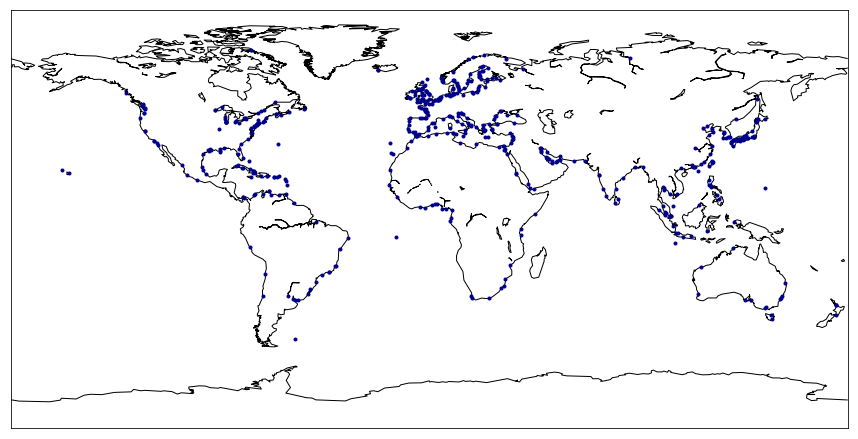

In [59]:
# Plot the V sized ports
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in sizeMLPorts.index:
    map.plot(list(sizeMLPorts.loc[port].geometry.coords)[0][0],
            list(sizeMLPorts.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [60]:
sizeMLPorts.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry,ISO3,CountryName
0,61160.0,61100.0,KUSHIRO KO,JP,42.983333,144.366667,42.0,59.0,N,144.0,...,Y,Y,Y,Y,C,None,M,POINT (144.3666666666667 42.98333333333333),JPN,Japan
1,61170.0,61100.0,MURORAN KO,JP,42.350000,140.966667,42.0,21.0,N,140.0,...,Y,None,None,None,A,M,L,POINT (140.9666666666667 42.35),JPN,Japan
2,61190.0,61100.0,HAKODATE KO,JP,41.783333,140.716667,41.0,47.0,N,140.0,...,Y,Y,Y,Y,B,M,L,POINT (140.7166666666667 41.78333333333333),JPN,Japan
3,61230.0,61100.0,OTARU KO,JP,43.200000,141.016667,43.0,12.0,N,141.0,...,Y,Y,Y,Y,C,None,S,POINT (141.0166666666667 43.2),JPN,Japan
4,61385.0,61100.0,KAWASAKI KO,JP,35.500000,139.766667,35.0,30.0,N,139.0,...,Y,Y,Y,None,A,M,M,POINT (139.7666666666667 35.5),JPN,Japan


#### Let's take a look at some cargo-related variables.

In [61]:
cargoColumns = [column for column in ports_1.columns if 'cargo' in column.lower()]

In [62]:
cargoColumns

['CARGODEPTH', 'CARGOWHARF', 'CARGO_ANCH']

In [63]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in ports_1[column]]) \
           for uniVal in ports_1[column].unique()},'\n')

CARGODEPTH

{'O': 339, 'J': 325, 'None': 453, 'K': 392, 'G': 121, 'F': 49, 'P': 268, 'H': 154, 'L': 457, 'M': 450, 'D': 12, 'E': 38, 'B': 15, 'N': 533, 'A': 25, 'Q': 29, 'C': 9} 

CARGOWHARF

{'None': 875, 'Y': 2787, 'N': 7} 

CARGO_ANCH

{'Y': 1547, 'None': 2083, 'N': 39} 



And cargo variables for our sized-subset

In [64]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in sizeMLPorts[column]]) \
           for uniVal in sizeMLPorts[column].unique()},'\n')

CARGODEPTH

{'G': 53, 'F': 18, 'B': 6, 'J': 83, 'L': 63, 'K': 70, 'H': 55, 'M': 64, 'N': 41, 'E': 21, 'D': 4, 'P': 3, 'None': 25, 'O': 10, 'C': 2, 'A': 3} 

CARGOWHARF

{'Y': 488, 'None': 33} 

CARGO_ANCH

{'None': 300, 'Y': 211, 'N': 10} 



### Country distribution

In [65]:
print({C:sum([True if obs == C else False for obs in sizeMLPorts.COUNTRY]) for C in sizeMLPorts.COUNTRY.unique()},'\n')
print('\nThere are %i countries in the subset' % len(sizeMLPorts.COUNTRY.unique()))

{'JP': 37, 'ZA': 5, 'MZ': 2, 'TZ': 1, 'KE': 1, 'SO': 1, 'GB': 31, 'NL': 6, 'BE': 3, 'RU': 9, 'KR': 7, 'CN': 14, 'CM': 1, 'GA': 2, 'SH': 1, 'NG': 3, 'GN': 1, 'PH': 6, 'CI': 1, 'GH': 1, 'TG': 1, 'BJ': 1, 'TN': 3, 'MO': 1, 'DZ': 3, 'MA': 4, 'MR': 1, 'SN': 1, 'TR': 6, 'SY': 2, 'HK': 1, 'TW': 4, 'MY': 7, 'TH': 3, 'KH': 1, 'VN': 1, 'LB': 2, 'LY': 2, 'GU': 1, 'UA': 3, 'GR': 8, 'US': 59, 'NZ': 3, 'BG': 1, 'RO': 2, 'AU': 13, 'IT': 16, 'HR': 2, 'MT': 1, 'ID': 9, 'CX': 1, 'ES': 17, 'GI': 1, 'PT': 4, 'SG': 3, 'FR': 18, 'EG': 6, 'YE': 3, 'LK': 2, 'IN': 7, 'BD': 1, 'IR': 4, 'PK': 2, 'IE': 4, 'AE': 5, 'BH': 3, 'SA': 1, 'KW': 2, 'IQ': 1, 'SD': 2, 'CO': 2, 'PA': 3, 'MX': 7, 'CA': 18, 'DE': 9, 'DK': 3, 'CL': 2, 'FI': 12, 'PE': 1, 'BR': 11, 'EE': 1, 'LV': 3, 'LT': 1, 'PL': 4, 'SE': 13, 'QA': 1, 'AR': 3, 'VE': 3, 'GY': 1, 'MQ': 1, 'IL': 1, 'CW': 2, 'GP': 1, 'DO': 2, 'IS': 2, 'NO': 11, 'PR': 3, 'VG': 1, 'AG': 1, 'CU': 9, 'HT': 1, 'BM': 1, 'BS': 1, 'UY': 1, 'FK': 1, 'JM': 1, 'TT': 1} 


There are 107 countr

### End of exploratory stats
## Let's take a look at the UK Data

In [66]:
# Opening the Open Document Sheet
doc = ezodf.opendoc('../Data Sources/UK Port Freight (2)/port-freight-statistics-2017/port0400.ods')
# Data sheet
sheet = doc.sheets[2]

In [67]:
# A way to extract the data
start = time.time()
totalContent = []
for i,row in enumerate(sheet.rows()):
    if i == 0:
        columns = [cell.value for cell in row]
        
        columns = columns[:-1]
        
#         individualUKPortData = pd.DataFrame(columns = columns)
    if 0 < i:
    
        content = [cell.value for cell in row]
        totalContent.append(content[:-1])
        
        #individualUKPortData.loc[i] = content
individualUKPortData = pd.DataFrame(totalContent,columns = columns).fillna('None')
end = time.time()

print('The processing took %.3f seconds' % (end-start))

The processing took 4.651 seconds


In [68]:
individualUKPortData.shape
#individualUKPortData['Year'] = np.array(individualUKPortData['Year']).astype('datetime64')

(89893, 7)

In [69]:
individualUKPortData.loc[0:10]

,Reporting Port,Year,direction,Cargo_Code,Region,Type,Value (thousands)
0,Aberdeen,2017,1,13,Domestic traffic,Tonnage,330585
1,Aberdeen,2017,1,13,Domestic traffic,Tonnage,512503
2,Aberdeen,2017,1,13,European Union traffic,Tonnage,81612.7
3,Aberdeen,2017,1,13,Domestic traffic,Units,0
4,Aberdeen,2017,1,13,Domestic traffic,Units,0
5,Aberdeen,2017,1,13,European Union traffic,Units,0
6,Aberdeen,2017,2,13,Domestic traffic,Tonnage,11091.4
7,Aberdeen,2017,2,13,Domestic traffic,Tonnage,394723
8,Aberdeen,2017,2,13,European Union traffic,Tonnage,3881.98
9,Aberdeen,2017,2,13,Domestic traffic,Units,0


### Let's see some unique values, to get an idea of the opportunities that the data presents.

In [70]:
for column in individualUKPortData.columns:
    print('This is "%s"'% column,'\n\n','The unique values are:\n\n',individualUKPortData[column].unique(),'\n\n')

This is "Reporting Port" 

 The unique values are:

 ['Aberdeen' 'Belfast' 'Boston' 'Bristol' 'Cairnryan' 'Cardiff' 'Clyde'
 'Cromarty Firth' 'Dover' 'Dundee' 'Felixstowe' 'Fishguard' 'Forth'
 'Fowey' 'Glensanda' 'Goole' 'Great Yarmouth' 'Grimsby & Immingham'
 'Harwich' 'Heysham' 'Holyhead' 'Hull' 'Ipswich'
 'Kilroot Power Station Jetty' 'Larne' 'Liverpool' 'Loch Ryan' 'London'
 'Londonderry' 'Manchester' 'Medway' 'Milford Haven' 'Newhaven' 'Newport'
 'Orkney' 'Peterhead' 'Plymouth' 'Poole' 'Port Talbot' 'Portsmouth'
 'Ramsgate' 'River Trent' 'Rivers Hull & Humber' 'Shoreham' 'Southampton'
 'Sullom Voe' 'Sunderland' 'Swansea' 'Tees & Hartlepool' 'Tyne'
 'Warrenpoint' 'Stranraer' 'Fleetwood' 'None'] 


This is "Year" 

 The unique values are:

 [2017.0 2016.0 2015.0 2014.0 2013.0 2012.0 2011.0 2010.0 2009.0 2008.0
 2007.0 2006.0 2005.0 2004.0 2003.0 2002.0 2001.0 2000.0 'None'] 


This is "direction" 

 The unique values are:

 [1.0 2.0 'None'] 


This is "Cargo_Code" 

 The unique valu

From the above, it seems natural to consider the direction and the region for each port, as we already are restricted on the year.

In [71]:
individualUKPortData2017 = individualUKPortData[individualUKPortData.Year == 2017]
print(individualUKPortData2017.shape)

(4330, 7)


In [72]:
portsUK = pd.DataFrame(index=individualUKPortData2017['Reporting Port'].unique())

dataholder = [[] for i in np.arange(6)] # <- because there are 3 unique values in 'Regions' and 2 unique values in 'Directions'
#                                            plus a total column
# Excluding the 'None'
regions = [region for region in individualUKPortData2017.Region.unique() if region != 'None']

j = 0

for region in regions:
    temp = individualUKPortData2017[individualUKPortData2017.Region==region]
    
    for port in individualUKPortData2017['Reporting Port'].unique():
        # Inwards
        dataholder[j].append(round(sum(temp[(temp['Reporting Port'] == port) & (temp.direction == 1)\
                                           & (temp.Type == 'Tonnage')]['Value (thousands)'])/1000,3))

        # Outwards
        dataholder[j+1].append(round(sum(temp[(temp['Reporting Port'] == port) & (temp.direction == 2)\
                                           & (temp.Type == 'Tonnage')]['Value (thousands)'])/1000,3))
        #dataholder[-1].append(dataholder[j][-1]+dataholder[j+1][-1])
    j += 2

In [73]:
for column in np.arange(len(dataholder)):
    portsUK[str(column)] = dataholder[column]

# print the regions, to set correct columns
print(regions)

['Domestic traffic', 'European Union traffic', 'Non-EU Foreign traffic']


In [74]:
portsUK.columns = ['domestic_traffic_inwards','domestic_traffic_outwards',
                  'european_union_traffic_inwards','european_union_traffic_outwards',
                  'non-eu_foreign_traffic_inwards','non-eu_foreign_traffic_outwards']

In [75]:
portsUK

,domestic_traffic_inwards,domestic_traffic_outwards,european_union_traffic_inwards,european_union_traffic_outwards,non-eu_foreign_traffic_inwards,non-eu_foreign_traffic_outwards
Aberdeen,1536.467,1796.029,238.273,201.741,172.942,112.968
Belfast,5998.598,5767.772,2662.600,1109.972,2512.152,174.836
Boston,0.000,0.000,601.379,116.588,18.393,2.052
Bristol,1906.920,145.195,1611.869,677.590,3686.488,712.625
Cairnryan,1399.104,1448.364,0.000,0.000,0.000,0.000
Cardiff,1046.743,54.824,346.492,37.398,88.082,0.000
Clyde,752.246,824.259,1182.040,1158.429,4565.309,382.849
Cromarty Firth,54.521,21.417,90.180,46.479,13.390,0.684
Dover,4.083,20.298,15287.804,10668.650,241.143,0.728
Dundee,18.455,1.846,419.428,64.350,61.840,0.442


In [76]:
# Adding the total column
portsUK['Total'] = portsUK.sum(axis=1)

### It is now time to attach geometries to the constructed data

In [77]:
print('The number of UK ports present in the global ports file:', len([ukport for ukport in portsUK.index if \
 any([True if ukport.lower() in globalports.lower() else False for globalports in ports.port_name])]),'\n')
print('The ports present are:\n')
[print(ukport) for ukport in portsUK.index if \
 any([True if ukport.lower() in globalports.lower() else False for globalports in ports.port_name])]
print()

The number of UK ports present in the global ports file: 39 

The ports present are:

Aberdeen
Belfast
Boston
Bristol
Cardiff
Clyde
Dover
Dundee
Felixstowe
Fishguard
Fowey
Glensanda
Goole
Great Yarmouth
Harwich
Heysham
Holyhead
Hull
Ipswich
Larne
Liverpool
London
Londonderry
Manchester
Milford Haven
Newhaven
Newport
Peterhead
Plymouth
Poole
Port Talbot
Portsmouth
Ramsgate
Shoreham
Southampton
Sullom Voe
Sunderland
Swansea
Tyne



### Time to subset the UK-ports data

In [78]:
ports.head()

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,code
0,SHAKOTAN,RUS,Russia,43.866667,146.833333,Minor,Coastal,None,POINT (146.8333333333333 43.86666666666667),0,0,0,SHAKOTAN
1,MOMBETSU KO,JPN,Japan,44.350000,143.350000,Minor,Coastal,None,POINT (143.35 44.35),0,0,0,MOMBETSU KO
2,ABASHIRI KO,JPN,Japan,44.016667,144.283333,Small,Coastal,None,POINT (144.2833333333333 44.01666666666667),0,0,0,ABASHIRI KO
3,NEMURO KO,JPN,Japan,43.333333,145.583333,Small,Coastal,None,POINT (145.5833333333333 43.33333333333334),0,0,0,NEMURO KO
4,HANASAKI KO,JPN,Japan,43.283333,145.583333,Minor,Coastal,None,POINT (145.5833333333333 43.28333333333333),0,0,0,HANASAKI KO


In [79]:
portsUKinGlobal = portsUK[[True if any([True if (ukport.lower() in globalports.lower()) & (iso == 'GBR')\
                                        else False for globalports,iso in zip(ports.port_name,ports.iso3)]) else False for ukport in portsUK.index]]
portsUKinGlobal = portsUKinGlobal.sort_index()

In [80]:
portsUKinGlobal

,domestic_traffic_inwards,domestic_traffic_outwards,european_union_traffic_inwards,european_union_traffic_outwards,non-eu_foreign_traffic_inwards,non-eu_foreign_traffic_outwards,Total
Aberdeen,1536.467,1796.029,238.273,201.741,172.942,112.968,4058.420
Belfast,5998.598,5767.772,2662.600,1109.972,2512.152,174.836,18225.930
Boston,0.000,0.000,601.379,116.588,18.393,2.052,738.412
Bristol,1906.920,145.195,1611.869,677.590,3686.488,712.625,8740.687
Cardiff,1046.743,54.824,346.492,37.398,88.082,0.000,1573.539
Dover,4.083,20.298,15287.804,10668.650,241.143,0.728,26222.706
Dundee,18.455,1.846,419.428,64.350,61.840,0.442,566.361
Felixstowe,226.259,290.304,4906.184,2914.107,12821.984,7868.952,29027.790
Fishguard,11.329,0.000,211.404,157.838,0.000,0.000,380.571
Fowey,7.280,8.730,0.000,297.393,0.000,168.293,481.696


### Time to subset the global-ports data, in order to merge the two subsetted DataFrames

In [81]:
portsGlobalInUK = ports[([True if any([True if ukport.lower() in globalport.lower()\
                                        else False for ukport in portsUK.index]) \
                         else False for globalport in ports.port_name]) & (ports.iso3 == 'GBR')]
portsGlobalInUK = portsGlobalInUK.sort_values(by=['port_name'])
portsGlobalInUK = portsGlobalInUK.reset_index(drop=True)
# Change this manually correction later
portsGlobalInUK['port_name'].loc[17] = 'HULL'
portsGlobalInUK = portsGlobalInUK.sort_values(by=['port_name'])
portsGlobalInUK = portsGlobalInUK.reset_index(drop=True)

C:\Users\Krist\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
portsGlobalInUK

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,code
0,ABERDEEN,GBR,United Kingdom,57.150000,-2.083333,Medium,River,None,POINT (-2.083333333333333 57.15),0,0,0,ABERDEEN
1,BELFAST,GBR,United Kingdom,54.616667,-5.900000,Major,River,S,POINT (-5.9 54.61666666666667),0,0,0,BELFAST
2,BOSTON,GBR,United Kingdom,52.966667,-0.016667,Small,River,S,POINT (-0.01666666666666667 52.96666666666667),0,0,0,BOSTON
3,BRISTOL,GBR,United Kingdom,51.466667,-2.633333,Medium,River,S,POINT (-2.633333333333333 51.46666666666667),0,0,0,BRISTOL
4,CARDIFF,GBR,United Kingdom,51.450000,-3.166667,Medium,Coastal,S,POINT (-3.166666666666667 51.45),0,0,0,CARDIFF
5,DOVER HARBOR,GBR,United Kingdom,51.116667,1.333333,Small,Coastal,M,POINT (1.333333333333333 51.11666666666667),0,0,0,DOVER HARBOR
6,DUNDEE,GBR,United Kingdom,56.466667,-2.950000,Major,River,None,POINT (-2.95 56.46666666666667),0,0,0,DUNDEE
7,FELIXSTOWE,GBR,United Kingdom,51.950000,1.316667,Minor,River,S,POINT (1.316666666666667 51.95),0,0,0,FELIXSTOWE
8,FISHGUARD,GBR,United Kingdom,52.016667,-4.983333,Small,Coastal,S,POINT (-4.983333333333333 52.01666666666667),0,0,0,FISHGUARD
9,FOWEY HARBOUR,GBR,United Kingdom,50.333333,-4.633333,Small,River,M,POINT (-4.633333333333333 50.33333333333334),0,0,0,FOWEY HARBOUR


Because there are found one more port UK in the global file, than the other way around, a inspection of the found ports above is needed. It is seen that two ports for Liverpool are detected, a minor and a large one. Comparing with the previous table, it is seen that the Liverpool-port of interest is the third largest in UK, which implies that we manually drop the minor Liverpool port found above. 

In [83]:
portsGlobalInUK = portsGlobalInUK.drop([20])
portsGlobalInUK = portsGlobalInUK.reset_index(drop=True)
portsGlobalInUK = portsGlobalInUK.set_index(portsUKinGlobal.index)

In [84]:
# Joining together the subsetted dataframes

UKports = portsUKinGlobal.join(portsGlobalInUK)

In [85]:
UKports

,domestic_traffic_inwards,domestic_traffic_outwards,european_union_traffic_inwards,european_union_traffic_outwards,non-eu_foreign_traffic_inwards,non-eu_foreign_traffic_outwards,Total,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,code
Aberdeen,1536.467,1796.029,238.273,201.741,172.942,112.968,4058.420,ABERDEEN,GBR,United Kingdom,57.150000,-2.083333,Medium,River,None,POINT (-2.083333333333333 57.15),0,0,0,ABERDEEN
Belfast,5998.598,5767.772,2662.600,1109.972,2512.152,174.836,18225.930,BELFAST,GBR,United Kingdom,54.616667,-5.900000,Major,River,S,POINT (-5.9 54.61666666666667),0,0,0,BELFAST
Boston,0.000,0.000,601.379,116.588,18.393,2.052,738.412,BOSTON,GBR,United Kingdom,52.966667,-0.016667,Small,River,S,POINT (-0.01666666666666667 52.96666666666667),0,0,0,BOSTON
Bristol,1906.920,145.195,1611.869,677.590,3686.488,712.625,8740.687,BRISTOL,GBR,United Kingdom,51.466667,-2.633333,Medium,River,S,POINT (-2.633333333333333 51.46666666666667),0,0,0,BRISTOL
Cardiff,1046.743,54.824,346.492,37.398,88.082,0.000,1573.539,CARDIFF,GBR,United Kingdom,51.450000,-3.166667,Medium,Coastal,S,POINT (-3.166666666666667 51.45),0,0,0,CARDIFF
Dover,4.083,20.298,15287.804,10668.650,241.143,0.728,26222.706,DOVER HARBOR,GBR,United Kingdom,51.116667,1.333333,Small,Coastal,M,POINT (1.333333333333333 51.11666666666667),0,0,0,DOVER HARBOR
Dundee,18.455,1.846,419.428,64.350,61.840,0.442,566.361,DUNDEE,GBR,United Kingdom,56.466667,-2.950000,Major,River,None,POINT (-2.95 56.46666666666667),0,0,0,DUNDEE
Felixstowe,226.259,290.304,4906.184,2914.107,12821.984,7868.952,29027.790,FELIXSTOWE,GBR,United Kingdom,51.950000,1.316667,Minor,River,S,POINT (1.316666666666667 51.95),0,0,0,FELIXSTOWE
Fishguard,11.329,0.000,211.404,157.838,0.000,0.000,380.571,FISHGUARD,GBR,United Kingdom,52.016667,-4.983333,Small,Coastal,S,POINT (-4.983333333333333 52.01666666666667),0,0,0,FISHGUARD
Fowey,7.280,8.730,0.000,297.393,0.000,168.293,481.696,FOWEY HARBOUR,GBR,United Kingdom,50.333333,-4.633333,Small,River,M,POINT (-4.633333333333333 50.33333333333334),0,0,0,FOWEY HARBOUR


In [86]:
UKports.columns

Index(['domestic_traffic_inwards', 'domestic_traffic_outwards',
       'european_union_traffic_inwards', 'european_union_traffic_outwards',
       'non-eu_foreign_traffic_inwards', 'non-eu_foreign_traffic_outwards',
       'Total', 'port_name', 'iso3', 'country_name', 'latitude', 'longitude',
       'harborsize', 'harbortype', 'railway', 'geometry',
       'top_20_busiest_ports', 'busiest_ports_ranking',
       'amount_shipped_through', 'code'],
      dtype='object')

In [87]:
## adding top-five-busiest-UKports element to the UK ports.
UKports['code'] = UKports.port_name
topFiveNames = list(UKports.sort_values(by=['Total'],ascending=False)['port_name'][0:5])
UKports['busiest_UKports'] = [1 if name in topFiveNames else 0 for name in UKports.port_name]

In [88]:
UKports[UKports['busiest_UKports']==1]

,domestic_traffic_inwards,domestic_traffic_outwards,european_union_traffic_inwards,european_union_traffic_outwards,non-eu_foreign_traffic_inwards,non-eu_foreign_traffic_outwards,Total,port_name,iso3,country_name,...,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,code,busiest_UKports
Felixstowe,226.259,290.304,4906.184,2914.107,12821.984,7868.952,29027.790,FELIXSTOWE,GBR,United Kingdom,...,1.316667,Minor,River,S,POINT (1.316666666666667 51.95),0,0,0,FELIXSTOWE,1
Liverpool,3373.091,1620.920,7158.001,4046.713,13525.920,2816.604,32541.249,LIVERPOOL,GBR,United Kingdom,...,-3.000000,Major,River,L,POINT (-3 53.41666666666666),0,0,0,LIVERPOOL,1
London,10215.198,280.880,19920.494,3871.001,12120.315,3460.507,49868.395,LONDON,GBR,United Kingdom,...,-0.083333,Major,River,M,POINT (-0.08333333333333333 51.5),0,0,0,LONDON,1
Milford Haven,475.613,4309.479,2265.394,4323.313,17505.069,3110.771,31989.639,MILFORD HAVEN,GBR,United Kingdom,...,-5.033333,Medium,River,None,POINT (-5.033333333333333 51.71666666666667),0,0,0,MILFORD HAVEN,1
Southampton,2285.159,1432.155,4027.592,4572.739,15187.591,6965.804,34471.040,SOUTHAMPTON,GBR,United Kingdom,...,-1.400000,Major,River,M,POINT (-1.4 50.9),0,0,0,SOUTHAMPTON,1


In [89]:
busiestUKports = list(UKports[UKports['busiest_UKports']==1].port_name)

In [90]:
ports['busiest_ukports'] = [1 if port in busiestUKports else 0 for port in ports.port_name]

In [91]:
ports[ports['busiest_ukports']==1]

,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,code,busiest_ukports
1006,SOUTHAMPTON,GBR,United Kingdom,50.900000,-1.400000,Major,River,M,POINT (-1.4 50.9),0,0,0,SOUTHAMPTON,1
1015,MILFORD HAVEN,GBR,United Kingdom,51.716667,-5.033333,Medium,River,None,POINT (-5.033333333333333 51.71666666666667),0,0,0,MILFORD HAVEN,1
1193,LIVERPOOL,GBR,United Kingdom,53.416667,-3.000000,Major,River,L,POINT (-3 53.41666666666666),0,0,0,LIVERPOOL,1
1488,LONDON,GBR,United Kingdom,51.500000,-0.083333,Major,River,M,POINT (-0.08333333333333333 51.5),0,0,0,LONDON,1
1914,SOUTHAMPTON,CAN,Canada,44.500000,-81.383333,Minor,Coastal,None,POINT (-81.38333333333334 44.5),0,0,0,SOUTHAMPTON,1
2982,FELIXSTOWE,GBR,United Kingdom,51.950000,1.316667,Minor,River,S,POINT (1.316666666666667 51.95),0,0,0,FELIXSTOWE,1


In [92]:
ports = ports.rename(index=str, columns={"harbortype": "type", "harborsize": "size"})
UKports = UKports.rename(index=str, columns={"harbortype": "type", "harborsize": "size"})

In [93]:
ports.head()

,port_name,iso3,country_name,latitude,longitude,size,type,railway,geometry,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,code,busiest_ukports
0,SHAKOTAN,RUS,Russia,43.866667,146.833333,Minor,Coastal,None,POINT (146.8333333333333 43.86666666666667),0,0,0,SHAKOTAN,0
1,MOMBETSU KO,JPN,Japan,44.350000,143.350000,Minor,Coastal,None,POINT (143.35 44.35),0,0,0,MOMBETSU KO,0
2,ABASHIRI KO,JPN,Japan,44.016667,144.283333,Small,Coastal,None,POINT (144.2833333333333 44.01666666666667),0,0,0,ABASHIRI KO,0
3,NEMURO KO,JPN,Japan,43.333333,145.583333,Small,Coastal,None,POINT (145.5833333333333 43.33333333333334),0,0,0,NEMURO KO,0
4,HANASAKI KO,JPN,Japan,43.283333,145.583333,Minor,Coastal,None,POINT (145.5833333333333 43.28333333333333),0,0,0,HANASAKI KO,0


In [102]:
len(ports.iso3.unique())

180

In [94]:
gpdPorts = gpd.GeoDataFrame(ports,geometry=ports.geometry,crs = countries.crs)

In [95]:
# Based on this answer: https://gis.stackexchange.com/questions/159681/geopandas-cant-save-geojson
with open('../Final Data/ports.geojson', 'w') as f:
    f.write(gpdPorts.to_json())
with open('../Final Data/ports.json', 'w') as f:
    f.write(gpdPorts.to_json())

In [96]:
portsToSave = ports.drop(['geometry'],axis=1)
portsToSave.to_csv('../Final Data/ports.csv')

### Writing the files

In [97]:
gpdUKPorts = gpd.GeoDataFrame(UKports,geometry=UKports.geometry,crs = countries.crs)

In [98]:
# Based on this answer: https://gis.stackexchange.com/questions/159681/geopandas-cant-save-geojson
with open('../Final Data/UKports.geojson', 'w') as f:
    f.write(gpdUKPorts.to_json())

In [99]:
# Based on this answer: https://gis.stackexchange.com/questions/159681/geopandas-cant-save-geojson
with open('../Final Data/UKports.json', 'w') as f:
    f.write(gpdUKPorts.to_json())

In [100]:
UKportsToSave = UKports.drop(['geometry'],axis=1)
UKportsToSave.to_csv('../Final Data/UKports.csv')